In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
HTML('''
<script>
    function toggleCodeCells() {
      var codeCells = document.querySelectorAll('.jp-CodeCell');

      codeCells.forEach(function(cell) {
        var inputArea = cell.querySelector('.jp-InputArea');
        if (inputArea) {
          var currentDisplay = inputArea.style.display || getComputedStyle(inputArea).display;
          inputArea.style.display = currentDisplay === 'none' ? '' : 'none';
        }
      });
    }
</script>

<!-- Add a button to toggle visibility of input code cells -->
<button onclick="toggleCodeCells()">Toggle Code Cells</button>
''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

## Syllabus

1. Probabilities and interpretations
2. Probability distributions
3. Parameter estimation
4. **Maximum likelihood**
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. Hypothesis testing
9. Probability and confidence level
10. Limit setting
11. Introduction to multivariate analysis techniques

# Chapter 4

## Topics

**[4.1 Bayesian inference and likelihood function](#4.1-Bayesian-inference-and-likelihood-function)**
- 4.1.1 Recap and likelihood function
- 4.1.2 Maximum a posteriori and maximum likelihood

**[4.2 Maximum likelihood as an estimator](#4.2-Maximum-likelihood-as-an-estimator)**
- 4.2.1 Maximum likelihood invariance
- 4.2.2 Efficiency of the maximum likelihood
- 4.2.3 Variance on maximum likelihood estimators

## Further Reading Material

- **Barlow**: Chapter 5.1.2 - *The likelihood function*
- **Barlow**: Chapter 5.1.3 - *Minimum variance bound*
- **Barlow**: Chapter 5.3 - *Maximum likelihood*
- **Cowan**: Chapter 6 (sections 6.1 to 6.8) - *Maximum likelihood and minimum variance bound*

## 4.1 Bayesian inference and likelihood function

### 4.1.1 Recap and likelihood function

_[This section follows from some of Barlow, Chapter 5, and Cowan, Chapter 6]_

We have seen earlier in this course the derivation of **Bayes' theorem**, which is a method in statistical inference to update the probability of a hypothesis as more prior evidence become available. Let us recall the equation:

\begin{eqnarray}
  P(a \mid x) &=& \frac{I(a) \mathcal{L}(x \mid a)}{E(x)} \\
         &=& \frac{I(a) \mathcal{L}(x \mid a)}{\sum_i I(a_i) \mathcal{L}(x \mid a_i)} = \frac{I(a) \mathcal{L}(x \mid a)}{\int_a I(a) \mathcal{L}(x \mid a) \, {\rm d}a}
\end{eqnarray}

with:

- $x$: data
- $a$: parameter of the model
- $P(a \mid x)$: the posterior probability
- $I(a)$: the prior probability
- $\mathcal{L}(x \mid a)$: the likelihood probability
- $E(x)$: the evidence

Knowing every component of the right hand side of the equation allows one to test a hypothesis and fitt a model to data. This is called *statistical inference*. In the above equation, $x$ typically refers to the data while $a$ denotes a certain parameter or a model.

In many instances, the data $x$ refers to a dataset comprising multiple invidual elements $x = \{x_1, x_2, \dots, x_N\}$ that are all drawn from the same probability distribution $\mathcal{L}(x_i \mid a)$ which depends on a certain parameter $a$. In this case, it is useful to extend the concept of individual likelihood probability to the joint likelihood probability. Assuming that the individual elements are independent, we can the joint probability as the product of the individual probabilities:

\begin{eqnarray}
  \mathcal{L}(x \mid a) &=& \mathcal{L}(x_1 \mid a) \mathcal{L}(x_2 \mid a) \dots \mathcal{L}(x_N \mid a) \\
        &=& \prod \mathcal{L}(x_i \mid a)
\end{eqnarray}

The above is often just called the **likelihood function**.

In such a situation we can rewrite the posterior probability as:

\begin{equation}
  P(a \mid x) = \frac{I(a) \mathcal{L}(x \mid a)}{E(x)} = \frac{I(a) \prod \mathcal{L}(x_i \mid a)}{E(x)} \,.
\end{equation}

### 4.1.2 Maximum a posteriori and maximum likelihood

In practical situations it may be difficult to know precisely the value of $E(x)$. It is often the case anyway that we are only interested in the relative value of $a$. One such example is for determining the most likely outcome of $a$, something we call the **maximum a posteriori (MAP)**. In which case we will see that the value of $E(x)$ is not essential.

Trying to identify the MAP corresponds to determining the value of $\widehat{a}_{\rm MAP}$ such that the posterior probability is maximum (i.e. derivative equal to zero):

\begin{eqnarray}
  \widehat{a}_{\rm MAP} &=& \arg \max_{\substack a} P(a \mid x) &\equiv& \left[ \frac{\partial P(a \mid x)}{\partial a} \right]_{a = \widehat{a}} = 0\\
              &=& \arg \max_{\substack a} \ln P(a \mid x) &\equiv& \left[ \frac{\partial \ln P(a \mid x)}{\partial a} \right]_{a = \widehat{a}} = 0 \,.
\end{eqnarray}

The last line from above is possible due to the nature of the logarithm being a monotically increasing function of its argument. If we take the previous expression for the posterior:

\begin{eqnarray}
  \ln P(a \mid x) &=& \ln \left( \frac{I(a) \prod \mathcal{L}(x_i \mid a)}{E(x)} \right) \\
             &=& \ln I(a) + \ln \prod \mathcal{L}(x_i \mid a) - \ln E(x) \\
             &=& \ln I(a) + \sum \ln \mathcal{L}(x_i \mid a) - \ln E(x) \,.
\end{eqnarray}

The above result is very important for a number of reasons. For instance it is far more convenient to deal with summations than products, especially when it comes to the numerical precision of computations (e.g. think about multiplying very small numbers with very large numbers). Combining the above two results we obtain:

\begin{eqnarray}
  \left[ \frac{\partial \ln P(a \mid x)}{\partial a} \right]_{a = \widehat{a}} = \left[ \frac{\partial \ln I(a)}{\partial a} + \sum \frac{\partial \ln \mathcal{L}(x_i \mid a)}{\partial a} \right]_{a = \widehat{a}} = 0 \,.
\end{eqnarray}

As we can see, in the case where we are interesting **in the MAP, the value of $E(x)$ is irrelevant** as it is independent of $a$.

#### Maximum likelihood estimation (MLE)

An interesting situation arises if the prior probability $I(a)$ is independent of $a$, in which case the above equation simplifies further:

\begin{eqnarray}
  \left[ \frac{\partial \ln P(a \mid x)}{\partial a} \right]_{a = \widehat{a}} = \left[ \sum \frac{\partial \ln \mathcal{L}(x_i \mid a)}{\partial a} \right]_{a = \widehat{a}} = 0 \,.
\end{eqnarray}

We commonly refer to this situation as having _flat priors_. Dealing with $a$ being constant is very typical as often there is no reason to favour a specific value of the parameter over another. In this case, the maximum a posteriori (MAP) simply reduces to a **maximum likelihood estimation (MLE)**:

\begin{equation}
  \widehat{a}_{\rm MAP} = \arg \max_{\substack a} P(a \mid x) = \arg \max_{\substack a} \mathcal{L}(x \mid a) = \widehat{a}_{\rm MLE} \,.
\end{equation}

<div class="example">Example 1: maximum likelihood for a simple function</div>

Consider a simple problem where we have the data sample $x = \{0.89, 0.03, 0.50, 0.36, 0.49\}$, which were obtained from a distribution having the form $\mathcal{L}(x_i \mid a) = 1 + a(x_i - 0.5)$ valid for $x_i \in [0,1]$. Let us calculate the total log likelihood for two cases:

\begin{eqnarray}
  \ln \mathcal{L} = \sum_i \ln \mathcal{L}(x_i \mid a=+1.0) &=& \ln 1.39 + \ln 0.53 + \ln 1.0 + \ln 0.86 + \ln 0.99 = -0.47 \\
  \ln \mathcal{L} = \sum_i \ln \mathcal{L}(x_i \mid a=-1.0) &=& \ln 0.61 + \ln 1.47 + \ln 1.0 + \ln 1.14 + \ln 1.01 = 0.03 \\
\end{eqnarray}

We can try other values of $a$ and display them on a plot.

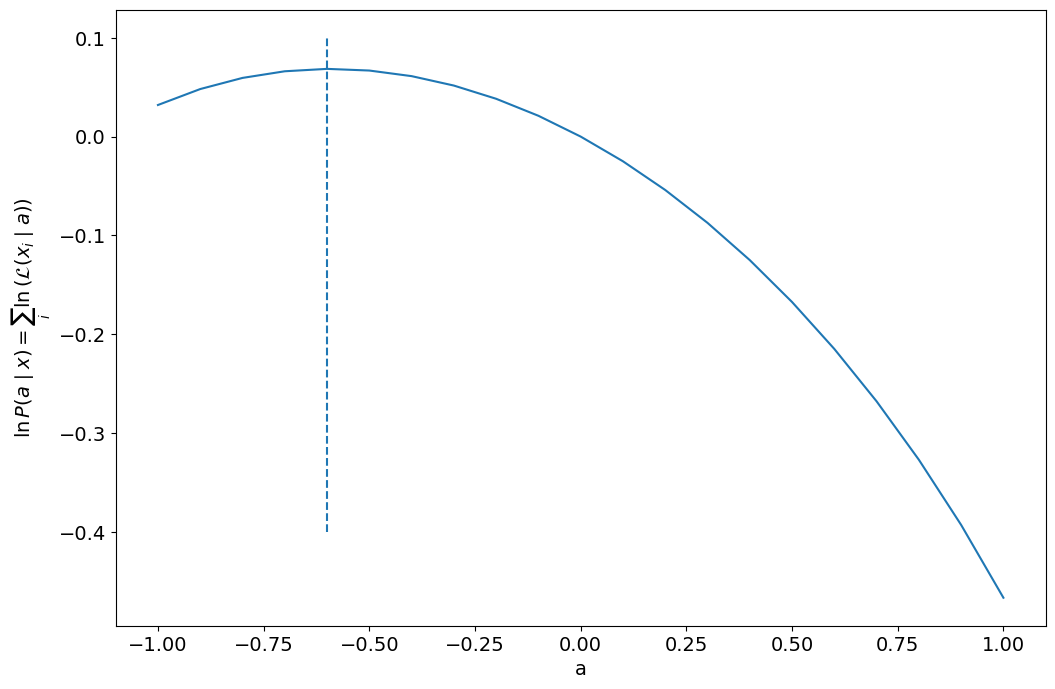

In [3]:
x = np.r_[0.89, 0.03, 0.50, 0.36, 0.49]

P = lambda a_: 1 + a_*(x - 0.5)

a = np.linspace(-1,1,21)
calc_ln_L = []
for ai in a:
    calc_ln_L.append( np.log(P(ai)).sum() )

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(a, calc_ln_L)
ax.vlines(-0.6, -0.4, 0.1, linestyles='--')
ax.set_xlabel('a')
ax.set_ylabel(r'$\ln P(a \mid x) = \sum_i \ln\left(\mathcal{L}(x_i \mid a)\right)$');

We can see from the above figure that the maximum likelihood occurs for a value which is roughly $a = -0.6$, so this is the maximum likelihood estimate $\widehat{a}$.

<div class="example">Example 2: MLE of a simple lifetime</div>

Supppose that we study the decay of a radioactive nucleus. The probability of decay is given by the exponential function:

\begin{equation}
  \mathcal{L}(t_i \mid \tau) = \frac{1}{\tau} e^{-t_i/\tau} \,,
\end{equation}

where $\tau$ is the characteristic decay lifetime. Let us imagine that we observe N events with recorded decay times $\left\{t_i\right\}$ and try to work out the most likely decay rate, $\widehat{\tau}$. We can calculate this by differentiating the logarithm of the likelihood:

\begin{eqnarray}
  \frac{\partial \ln \mathcal{L}}{\partial \tau} &=& \sum \frac{\partial}{\partial \tau} \ln{\left( \frac{1}{\tau} e^{-t_i/\tau} \right)} \\
                                   &=& \sum \left( \frac{t_i}{\tau^2} - \frac{1}{\tau} \right) \,.
\end{eqnarray}

Setting the above equation to zero and solving for $\tau$ allows us to obtain the MLE $\widehat{\tau}$:

\begin{equation}
  \widehat{\tau} = \frac{1}{N} \sum t_i \,.
\end{equation}

In this case, we conclude that the MLE is equal to the sample mean, $\widehat{\tau} = \langle t \rangle$.

*Below is an histogram displaying 1000 decay times for a specific particle. The actual decay time for the model is $\tau = 2$, whereas the estimate using the above formula is $\hat{\tau} = 1.96$.*

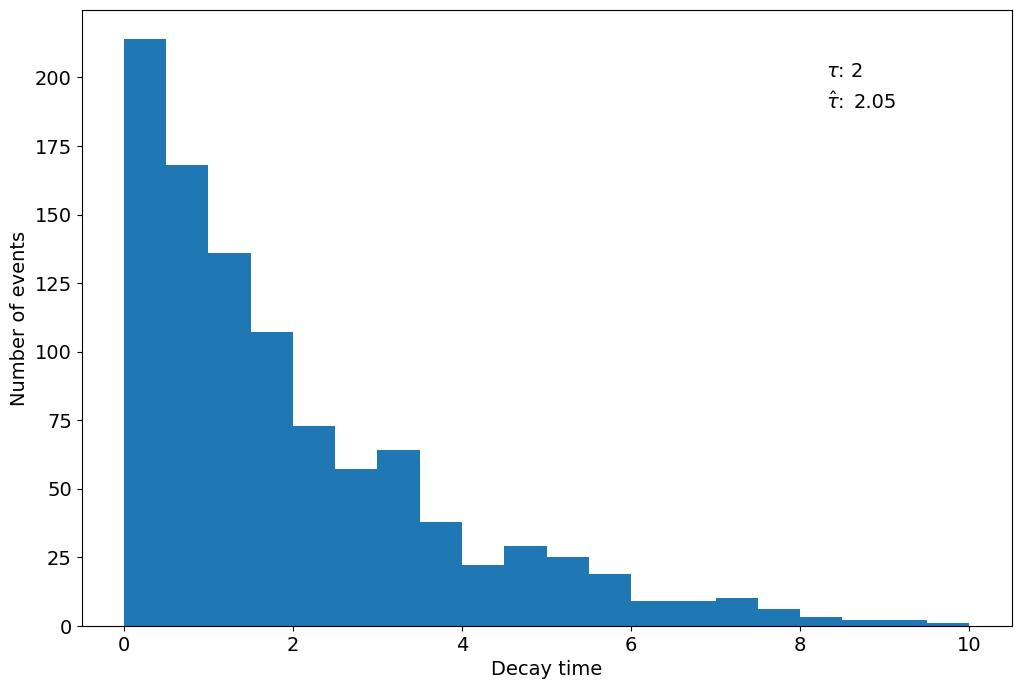

In [4]:
rng = np.random.default_rng(42)
tau = 2.
t = scipy.stats.expon.rvs(scale=tau, size=1000)
tau_fit = np.mean(t)

fig, ax = plt.subplots(figsize=(12,8))
ax.hist(t, bins=20, range=[0,10])
ax.set_xlabel('Decay time')
ax.set_ylabel('Number of events')
ax.text(0.8, 0.9, r'$\tau}$: 2', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.text(0.8, 0.85, r'$\hat{\tau}$:', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.text(0.83, 0.85, '{:.2f}'.format(tau_fit), horizontalalignment='left', verticalalignment='center', transform=ax.transAxes);

## 4.2 Maximum likelihood as an estimator

We have previously seen that good statistical estimators are consistent, unbiased and efficient. As the name alludes to, the maximum likelihood estimate provides a statistical estimator for the parameter which we attempt to maximise the likelihood for. We should now examine whether this maximum likelihood provides an estimator which can be qualified as "good".

Some insights about the MLE can be gained from the previous example about the decay of a radioactive particle. We have demonstrated that the MLE for the decay timescale, $\widehat{\tau}$, is simply the same as the arithmetic mean. This makes sense after all since the average lifetime of a radioactive particle (i.e. the average of the above function) is the very quantity that we call the lifetime constant $\tau$. This fact enables us to speculate about two facts:

1. We have shown in Chapter 3 that the arithmetic mean is a consistent estimator of the true mean. This implies that this specific MLE is also consistent and that potentially any MLE might satisfy the consistency requirement.
2. We have also shown in Chapter 3 that the arithmetic mean is an unbiased estimator of the true mean. This implies that this specific MLE is also unbiased and that potentially any MLE might satisfy the unbias requirement.

Without going into the full details/derivation, we will state the following properties of MLEs [see Barlow, Chapter 5, for more details]:

> 1. Generally (though not strictly always) consistent
> 2. Generally biased, but this disappears in the limit of large $N$ for any consistent estimator
> 3. Generally invariant
> 4. Generally efficient

We therefore conclude that the MLE can be thought of as a good estimator in most cases. The invariance is in itself a very useful property which mitigates some of the shortcomings of the other properties. Also, the convenience with which the MLE can be calculated is a big advantage as it sits on a sound probabilistic approach.

*Note: In this week's problem sheet, we will show that for a Gaussian likelihood with unknown mean and variance, the MLE provides an estimator for the mean which is consistent and unbiased, but consistent and biased for the standard deviation. However, as $N$ increases, the estimator for the standard deviation (which is the uncorrected sample standard deviation) becomes less and less biased (as the $1/N$ factors becomes closer to $1/(N-1)$.*

### 4.2.1 Maximum likelihood invariance

We have stated above the invariance of the MLE without any justification. Let us now look at this interesting property.

Recalling the earlier example of the lifetime of a radioactive particle, imagine that we wanted to redefine the likelihood using the decay constant $\lambda = 1 / \tau$ instead. We could redo the full differentiation and show that the MLE of the decay constant is $\widehat{\lambda} = N / \sum t_i$. We could however have used the simple fact that $\widehat{\lambda} = 1 / \widehat{\tau}$.

This property is what we call invariance; i.e. the fact that if $\widehat{a}$ is the MLE of $a$, then for any function $f(a)$ the MLE of $\widehat{f(a)}$ is $f(\widehat{a})$:
\begin{equation}
  \widehat{f(a)} = f(\widehat{a}) \,,
\end{equation}

It is possible to understand this principle by applying the chain rule:
\begin{equation}
  \left[ \frac{\partial \mathcal{L}}{\partial a} \right]_\widehat{a} = \left[ \frac{\partial \mathcal{L}}{\partial f(a)} \frac{\partial f(a)}{\partial a} \right]_\widehat{a} = 0 \,.
\end{equation}

Therefore, this implies that either $\partial \mathcal{L}/\partial f(a)$ or $\partial f(a)/\partial a$ must be equal to zero. However, the latter would only happend if $f(a)$ does not depend on $a$, but this would be a trivial case.

*Note: The invariance property does not preserve the unbiased nature of an estimator. Hence, while in the radioactive decay problem the MLE $\widehat{\tau}$ was in fact an unbiased estimator, its analogue $\widehat{\lambda}$ is not.*

### 4.2.2 Efficiency of the maximum likelihood

If we are interested to look at the efficiency of the maximum likelihood, we must consider the variance of a given estimator, $V(\widehat{a})$. It is in fact possible to derive a minimum bound, known as the **Rao-Cramér-Frechet (RCF) inequality** (also called **information inequality**):

\begin{equation}
  V(\widehat{a}) \ge \frac{\left( 1 + \frac{\partial b}{\partial a} \right)^2}{\left< -\frac{\partial^2 \ln \mathcal{L}}{\partial a^2} \right>} \,,
\end{equation}

where $b \equiv \left<\widehat{a}\right> - a$ is the bias. (*It is beyond the scope of this course to derive the RCF inequality, but more information can be found in Barlow, Chapter 5, and Cowan, Chapter 6.*)

In the case of an unbiased estimator ($b = 0$), the RCF inequality becomes known as the **minimum variance bound (MVB)**:

\begin{equation}
  V(\widehat{a})_{\rm MVB} \ge \frac{1}{\left< -\frac{\partial^2 \ln \mathcal{L}}{\partial a^2} \right>} \,.
\end{equation}

<div class="example">Example 1: variance of a simple lifetime</div>

Recall the previous example in which we calculated the MLE of a simple lifetime experiment. The log-likelihood is given by:

\begin{equation}
  \ln \mathcal{L} = \sum \ln{\left( \frac{1}{\tau} e^{-t_i/\tau} \right)} \\
\end{equation}

Differentiative twice yields:

\begin{eqnarray}
  \frac{\partial^2 \ln \mathcal{L}}{\partial \tau^2} &=& \frac{N}{\tau^2} \left( 1 - \frac{2}{N \tau} \sum t_i \right) \\
  &=& \frac{N}{\tau^2} \left( 1 - \frac{2\widehat{\tau}}{\tau} \right) \,.
\end{eqnarray}

It is possible to show that $\widehat{\tau}$ is unbiased (i.e. $b = \langle\widehat{\tau}\rangle - \tau = 0$) so that the RCF inequality reduces to the MVB. We can therefore calculate the inequality:

\begin{eqnarray}
  V(\widehat{\tau}) &\ge& \frac{1}{\left< -\frac{N}{\tau^2} \left( 1 - \frac{2\widehat{\tau}}{\tau} \right) \right>} \\
  &\ge& \frac{1}{-\frac{N}{\tau^2} \left( 1 - \frac{2\left<\widehat{\tau}\right>}{\tau} \right)} \\
  &\ge& \frac{\tau^2}{N} \,,
\end{eqnarray}
where we have use the fact that $E\left[\widehat{\tau}\right] = \langle\widehat{\tau}\rangle = \tau$ in order to get to the last line.

In specific cases one can directly calculate the variance of the estimator. This is the case for this problem, and one finds that $V(\widehat{\tau}) = \frac{\tau^2}{N}$. This means that the MVB is in fact the variance itself, and thus the maximum likelihood is maximally efficient.

### 4.2.3 Variance on maximum likelihood estimators

The RCF inequality already gives us a minimum bound on the variance of a maximum likelihood estimator. As we mentioned earlier the bias on the estimator vanishes at large $N$ and so it is often justified to use the MVB instead. We can therefore justify the use of the MVB rather than the RCF inequality. Furthermore, we can replace the averaging at the denominator and just evaluate the expression at the value of the estimator which we obtain from the MLE due to the fact that the estimator is assumed to be unbiased, hence $\left< \widehat{a} \right> = a$ (and all other terms in the averaging are constants). Finally, we also drop the inequality as we do with the uncertainty principle in quantum mechanics and simply assume that the lower bound is an equality. We can therefore write the variance on the estimator as:

\begin{equation}
  V(\widehat{a}) = \sigma^2_\widehat{a} = \left[ \left( -\frac{\partial^2 \ln \mathcal{L}}{\partial a^2} \right)^{-1} \right]_{a = \widehat{a}} \,.
\end{equation}

**This gives us a simple way to calculate the uncertainty on the MLE estimator.** With multiple parameters, the above equation can be generalised to the following relation:

\begin{equation}
  V(\widehat{a}_{ij}) = \left[ -\frac{\partial^2 \ln \mathcal{L}}{\partial a_i \partial a_j} \right]^{-1}_\widehat{a} \,.
\end{equation}

The above equation applies to every possible pair of parameters. As we did for the covariance in Chapter 1, it is often useful to represent them as a matrix. In this case, it is usually called the **Fisher information matrix**. Interestingly, the (matrix) inverse is in fact the covariance matrix of the estimated parameters.

One further way to understand the variance on MLE is to consider small variations around its maximum. Let us expand the log-likelihod around the estimator using a Taylor series:

\begin{equation}
  \ln \mathcal{L}(a) = \ln \mathcal{L}(\widehat{a}) + \left[ \frac{\partial \ln \mathcal{L}}{\partial a} \right]_\widehat{a} (a - \widehat{a}) + \frac{1}{2} \left[ \frac{\partial^2 \ln \mathcal{L}}{\partial a^2} \right]_\widehat{a} (a - \widehat{a})^2 + \dots \,.
\end{equation}

By definition of $\widehat{a}$, $\ln \mathcal{L}(\widehat{a}) = \ln \mathcal{L}_{\rm max}$ and the first derivative is equal to zero. If we express the second derivative in terms of $\sigma^2_\widehat{a}$, we find that to second order:

\begin{equation}
  \ln \mathcal{L}(a) \approx \ln \mathcal{L}_{\rm max} - \frac{(a - \widehat{a})^2}{2 \sigma^2_\widehat{a}} \,.
\end{equation}

This is essentially the equation of a Gaussian with mean $\widehat{a}$ and standard deviation $\widehat{\sigma_\widehat{a}}$:

\begin{equation}
  \mathcal{L}(a) \approx \mathcal{L}_{\rm max} \exp\left(\frac{-(a - \widehat{a})^2}{2 \sigma^2_\widehat{a}}\right) \,.
\end{equation}

Therefore:

\begin{equation}
  \ln \mathcal{L}(\widehat{a} \pm \sigma_\widehat{a}) = \ln \mathcal{L}_{\rm max} - \frac{1}{2} \,.
\end{equation}

We should highlight the important implications of what we have just derived:

> 1. The log-likelihood near the MLE can be approximated with a parabola, which means that the likelihood itself is a Gaussian in the MLE region.
> 2. The standard deviation on the MLE can be found by finding the value of the parameter for which the likelihood change by $\frac{1}{2}$ with respect to the MLE.

<div class="example">Example 1: maximum likelihood for a simple function</div>

Here we take again the earlier example of the maximum likelihood of a simple function and evaluate the uncertainty on the best-fit parameter by looking for the parameter value at which the log-likelihood decreases by $\frac{1}{2}$ with respect to the maximum value.

_Note: Sometimes, as is the case here, the log-likelihood function is not perfectly symmetrical. This means that the uncertainty needs to be evaluated for each side individually or otherwise approximated with a parabola if the problem was solved analytically._

Optimization terminated successfully.
         Current function value: -0.068503
         Iterations: 10
         Function evaluations: 20
ln_L_max: 0.068503
a_max: -0.59162
sigma_a_left: 1.2844
sigma_a_right: 1.5456


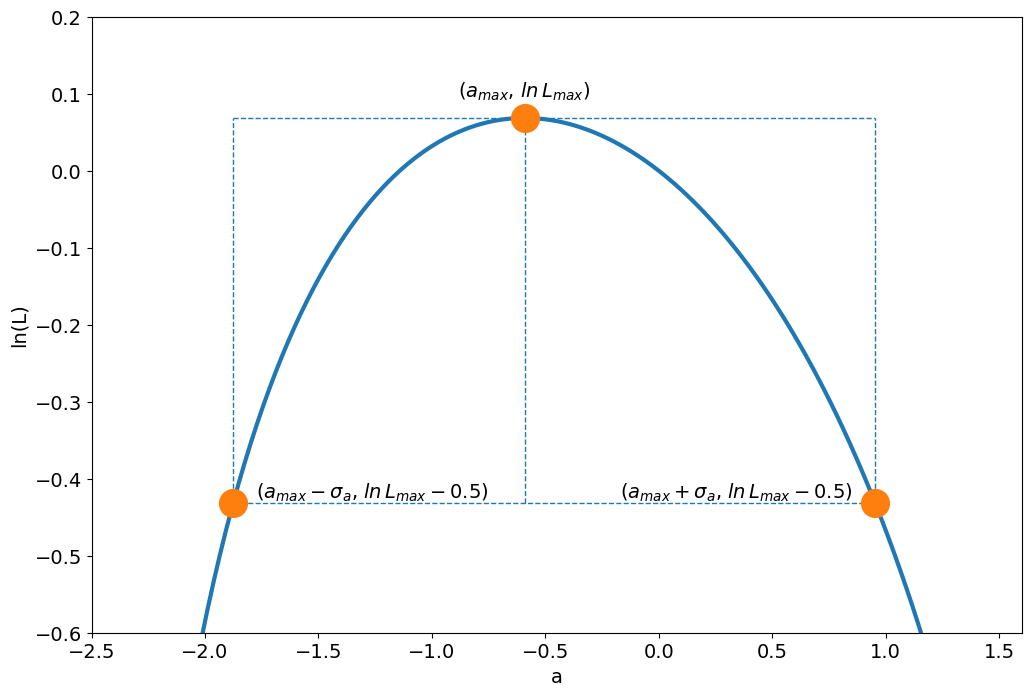

In [5]:
## The data
x = np.r_[0.89, 0.03, 0.50, 0.36, 0.49]

## The model
P = lambda a_: 1 + a_*(x - 0.5)
ln_L = lambda a_: np.log(P(a_)).sum()

## Finding the maximum likelihood
a_max = scipy.optimize.fmin(lambda a_: -ln_L(a_), -0.6)[0]
ln_L_max = ln_L(a_max)
print('ln_L_max: {:.5}'.format(ln_L_max))
print('a_max: {:.5}'.format(a_max))

## Finding the 1-sigma on the left
sigma_a_left = a_max - scipy.optimize.bisect(lambda a_: ln_L(a_)-ln_L_max+0.5, -2.0, a_max)
print('sigma_a_left: {:.5}'.format(sigma_a_left))

## Finding the 1-sigma on the left
sigma_a_right = -a_max + scipy.optimize.bisect(lambda a_: ln_L(a_)-ln_L_max+0.5, a_max, 1.0)
print('sigma_a_right: {:.5}'.format(sigma_a_right))

## Evaluating the model at a 
a = np.linspace(-2.1,1.2,241)
calc_ln_L = []
for ai in a:
    calc_ln_L.append( ln_L(ai) )

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(a, calc_ln_L, lw=3)
ax.vlines(a_max,               ln_L_max-0.5, ln_L_max, linestyles='--', lw=1)
ax.vlines(a_max-sigma_a_left,  ln_L_max-0.5, ln_L_max, linestyles='--', lw=1)
ax.vlines(a_max+sigma_a_right, ln_L_max-0.5, ln_L_max, linestyles='--', lw=1)
ax.hlines(ln_L_max, a_max-sigma_a_left, a_max+sigma_a_right, linestyles='--', lw=1)
ax.hlines(ln_L_max-0.5, a_max-sigma_a_left, a_max+sigma_a_right, linestyles='--', lw=1)
ax.plot([a_max, a_max-sigma_a_left, a_max+sigma_a_right], [ln_L_max, ln_L_max-0.5, ln_L_max-0.5], 'o', ms=20)
ax.text(a_max, ln_L_max+0.02, '($a_{max}$, $ln\,L_{max}$)', ha='center', va='bottom')
ax.text(a_max-sigma_a_left+0.1, ln_L_max-0.5, '($a_{max}-\sigma_a$, $ln\,L_{max}-0.5$)', ha='left', va='bottom')
ax.text(a_max+sigma_a_right-0.1, ln_L_max-0.5, '($a_{max}+\sigma_a$, $ln\,L_{max}-0.5$)', ha='right', va='bottom')
ax.set_xlabel('a')
ax.set_ylabel('ln(L)')
ax.set_xlim(-2.5,1.6)
ax.set_ylim(-0.6,0.2);

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>